## tensorflow basics

In [1]:
# Ref https://pythonprogramming.net/tensorflow-introduction-machine-learning-tutorial/

In [2]:
import tensorflow as tf

In [3]:
tf.reset_default_graph() # we created another graph, sess.close() only free computation resources, 
                         # but no assignaments so dont affect the graph that we created 
                         # remember, Session is a class for running TensorFlow operations.
# first we create our nodes in a graph
x1 = tf.constant(5)
x2 = tf.constant(6)

In [4]:
x1

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [5]:
x2 

<tf.Tensor 'Const_1:0' shape=() dtype=int32>

In [6]:
# we definr a sum of x1 and x2
result = tf.multiply(x1, x2)

In [7]:
result

<tf.Tensor 'Mul:0' shape=() dtype=int32>

In [8]:
# note you only have observed abstractions (no numbers)

In [9]:
# also operations are nodes in the graph

In [10]:
# now, we define a session and launches the graph
sess = tf.Session()

In [11]:
# now we run our operations and declaration of variables(constants)
sess.run(x1) #constant

5

In [12]:
# now we run our operations and declaration of variables(constants)
sess.run(result) #operation

30

In [13]:
# when we finished a session, we should to close it in order to free up the resources
sess.close()

In [14]:
# try now
# sess.run(x2) it will give you an error

In [15]:
# working with tf usually uses Python with statement,
# you will use the session for the block of code following 
# the sentence and will close the session when done
with tf.Session() as sess:
    print(sess.run(result))

30


In [16]:
# try now it again
# sess.run(result) it will give you an error, session was closed

In [17]:
# you can use tf on multiple devices, and even multiple distributed machines... i.e. gpu, cpus
with tf.Session() as sess:
    with tf.device('/cpu:0'):
        
        matrix1 = tf.constant([[3., 3.]])
        matrix2 = tf.constant([[2.], [2.]])
        product = tf.matmul(matrix1, matrix2)
        print(x1)
        print(product)
        print('The product is ', sess.run(product))
        print(product)       

Tensor("Const:0", shape=(), dtype=int32)
Tensor("MatMul:0", shape=(1, 1), dtype=float32, device=/device:CPU:0)
The product is  [[12.]]
Tensor("MatMul:0", shape=(1, 1), dtype=float32, device=/device:CPU:0)


In [18]:
# Ref. https://learningtensorflow.com/getting_started/

In [19]:
x = tf.constant(35, name='x')
y = tf.Variable(x + 5, name='y')

In [20]:
model = tf.global_variables_initializer() # a graph is created of the dependencies between the variables.

In [21]:
with tf.Session() as session:
    session.run(model)
    print(session.run(y))

40


In [22]:
!ls

bin
DCGAN_with_Keras.ipynb
etc
Exploring.ipynb
GAN_using_Keras.ipynb
include
lib
lib64
MarshOrchid.jpg
mnist
mnist_100.png
mnist_50.png
mnist.png
my_module.py
Neural_Machine_Translation_with_Attention_TensorFlow .ipynb
NeuralStyle
pip-selfcheck.json
pt2.py
pt3.py
pt.py
__pycache__
pyvenv.cfg
share
TensorFlow_BasicTutorial_1.ipynb
training_checkpoints
TransferLearningTutorialPytorch
using_module.py


In [23]:
!ls | grep 'jpg' # after downloading image

MarshOrchid.jpg


In [24]:
import matplotlib.image as mpimg
import os

In [25]:
dir_path = os.path.dirname(os.path.realpath('MarshOrchid.jpg'))

In [26]:
dir_path

'/home/ivan/Environments/CV'

In [27]:
filename = dir_path + '/MarshOrchid.jpg'

In [28]:
filename

'/home/ivan/Environments/CV/MarshOrchid.jpg'

In [29]:
image = mpimg.imread(filename)

In [30]:
print(image.shape)

(5528, 3685, 3)


In [31]:
import matplotlib.pyplot as plt

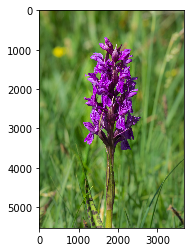

In [32]:
plt.imshow(image)

In [33]:
plt.show() # hummm

In [34]:
# we will rotate the image

In [35]:
x = tf.Variable(image, name='x')

In [36]:
model = tf.global_variables_initializer()

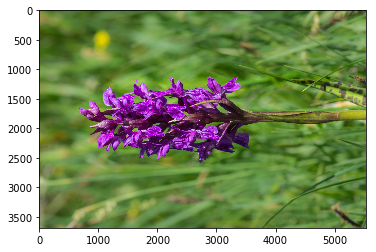

In [37]:
with tf.Session() as session:
    x = tf.transpose(x, perm=[1, 0, 2])
    session.run(model)
    result = session.run(x)
    plt.imshow(result)   
    plt.show()

In [38]:
? plt.show()

In [39]:
plt.show()

In [40]:
# now we are using placeholders

In [41]:
# In TensorFlow terminology, we then feed data into the graph through these placeholders.

In [42]:
x = tf.placeholder("float", None)
y = x * 2

In [43]:
with tf.Session() as session:
    result = session.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[2. 4. 6.]


In [44]:
# another example, now using arrays

In [45]:
x = tf.placeholder('float', [None, 3])
y = x * 2

In [46]:
with tf.Session() as sess:
    x_data = [[1,2,3], 
             [4,5,6],]
    result = sess.run(y, feed_dict={x: x_data})
    print(result)

[[ 2.  4.  6.]
 [ 8. 10. 12.]]


In [47]:
# now, we will use an image as placeholder

In [48]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

In [49]:
dir_path = os.path.dirname(os.path.realpath('MarshOrchid.jpg'))
filename = dir_path + "/MarshOrchid.jpg"
raw_image_data = mpimg.imread(filename)

In [50]:
image = tf.placeholder('uint8', [None, None, 3])
slice = tf.slice(image, [1000, 0, 0], [3000, -1, -1])

In [51]:
image

<tf.Tensor 'Placeholder_2:0' shape=(?, ?, 3) dtype=uint8>

In [52]:
slice

<tf.Tensor 'Slice:0' shape=(3000, ?, 3) dtype=uint8>

In [53]:
with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})
    print(result.shape)

(3000, 3685, 3)


In [54]:
result

array([[[ 64,  95,  27],
        [ 65,  96,  28],
        [ 64,  95,  27],
        ...,
        [ 92, 136,  75],
        [ 92, 136,  75],
        [ 92, 136,  75]],

       [[ 64,  95,  27],
        [ 64,  95,  27],
        [ 64,  95,  27],
        ...,
        [ 92, 136,  75],
        [ 93, 137,  76],
        [ 93, 137,  76]],

       [[ 65,  96,  28],
        [ 65,  96,  28],
        [ 65,  96,  28],
        ...,
        [ 92, 136,  75],
        [ 92, 136,  75],
        [ 92, 136,  75]],

       ...,

       [[ 80, 115,  59],
        [ 81, 116,  60],
        [ 81, 116,  60],
        ...,
        [ 97, 131,  54],
        [ 97, 131,  54],
        [ 98, 132,  55]],

       [[ 81, 116,  60],
        [ 81, 116,  60],
        [ 82, 117,  61],
        ...,
        [ 97, 131,  54],
        [ 97, 131,  54],
        [ 98, 132,  55]],

       [[ 81, 116,  60],
        [ 81, 116,  60],
        [ 81, 116,  60],
        ...,
        [ 97, 131,  54],
        [ 97, 131,  54],
        [ 98, 132,  55]]

In [55]:
image

<tf.Tensor 'Placeholder_2:0' shape=(?, ?, 3) dtype=uint8>

In [56]:
slice

<tf.Tensor 'Slice:0' shape=(3000, ?, 3) dtype=uint8>

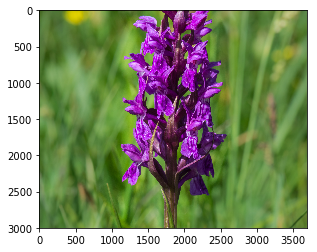

In [57]:
plt.imshow(result)
plt.show()

In [58]:
# interactive sessions

In [59]:
import tensorflow as tf
session = tf.InteractiveSession()

In [60]:
x = tf.constant(list(range(10)))

In [61]:
x

<tf.Tensor 'Const_4:0' shape=(10,) dtype=int32>

In [62]:
x.eval()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [63]:
tf.__version__

'1.10.0'

In [64]:
session.close()

In [65]:
# Closing sessions can be easy to forget. So we were using the with keyword in earlier steps to handle this. 

In [66]:
import resource
print("{} Kb".format(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss))

691404 Kb


In [67]:
import numpy as np
session = tf.InteractiveSession()

X = tf.constant(np.eye(10000))
Y = tf.constant(np.random.randn(10000, 300))

In [68]:
print("{} Kb".format(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss))

3664140 Kb


In [69]:
Z = tf.matmul(X, Y)

In [70]:
Z.eval()

array([[-0.47338516,  0.14392611,  0.42020858, ..., -0.13273026,
        -0.45769216, -0.63452413],
       [-0.74441406,  0.79501935,  0.48507974, ...,  1.76118125,
         1.27212003, -0.44174762],
       [-1.58339723, -0.16701792, -0.29352323, ..., -0.22118725,
         1.44337326,  2.51910653],
       ...,
       [-0.55635652,  0.31069058,  0.68924162, ...,  0.51248154,
         0.23349738, -0.27597211],
       [-0.68784894,  0.39868976, -0.56260705, ...,  0.98710831,
         0.17748399, -0.4983201 ],
       [ 0.45655151, -1.41874139, -0.18560193, ..., -0.09454207,
        -0.6832295 , -1.09089088]])

In [71]:
print("{} Kb".format(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss))

3664140 Kb


In [72]:
session.close()

## linear algebra

In [73]:
# examples of broadcasting

In [74]:
# first, we will use numbers

In [75]:
a = tf.constant([1,2,3], name='a')
b = tf.constant(4, name='b')

In [76]:
add_op = a + b # broadcasting

In [77]:
with tf.Session() as session:
    print(session.run(add_op))

[5 6 7]


In [78]:
# now, we will use arrays

In [79]:
a = tf.constant([[1,2,3],[4,5,6]], name = 'a')
b = tf.constant([[1,2,3],[4,5,6]], name = 'b')

In [80]:
add_op = a + b

In [81]:
with tf.Session() as session:
    print(session.run(add_op))

[[ 2  4  6]
 [ 8 10 12]]


In [82]:
# now, we combine an array with a scalar

In [83]:
a = tf.constant([[1,2,3],[4,5,6]], name='a')
b = tf.constant(100, name='b')
add_op = a + b

In [84]:
with tf.Session() as session:
    print(session.run(add_op))

[[101 102 103]
 [104 105 106]]


In [85]:
# and now, a tricky situation 1-D array with 2-D array

In [86]:
a = tf.constant([[1,2,3], [4,5,6]], name='a')
b = tf.constant([100, 101, 102], name='b')
add_op = a + b

In [87]:
with tf.Session() as session:
    print(session.run(add_op))

[[101 103 105]
 [104 106 108]]


In [88]:
# hummm, another situation

In [89]:
a = tf.constant([[1,2,3],[4,5,6]], name='a')
b = tf.constant([[100], [101]])
add_opp = a + b

In [90]:
with tf.Session() as session:
    print(session.run(add_op))

[[101 103 105]
 [104 106 108]]


In [91]:
a.shape

TensorShape([Dimension(2), Dimension(3)])

In [92]:
b.shape

TensorShape([Dimension(2), Dimension(1)])